# LINEAR REGRESSION 
### Scratch Implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Get the training data

dfx=pd.read_csv('./linearX.csv')
dfy=pd.read_csv('./linearY.csv')

dfx=dfx.values # Converting into numpy array
dfy=dfy.values

x=dfx.reshape((-1,))
y=dfy.reshape((-1,))

#print(dfx)
#print(dfx.shape) #99 row and 1 column. 
print(x.shape,y.shape) #this output shows linear array
print(x)

(99,) (99,)
[ 8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.   8.9
  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9  7.8
  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9  6.1
  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.   7.6
  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6  8.2
  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2  9.3
  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1  7.3
  7.3]


## Data Preprocessing and Visualisation

<function matplotlib.pyplot.show(*args, **kw)>

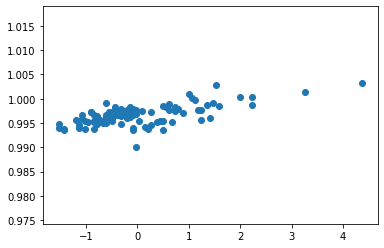

In [5]:
#plt.scatter(x,y)
x=(x-x.mean())/x.std() #Normalization i.e shifting dataset to origin.
y=y
plt.scatter(x,y)
plt.show

## Gradient Descent Algorithm
1. Start with a randon theta.
2. Repeat until converge.
   * Update theta according to the rule.

In [12]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x #theta[0],intercept and theta[1],slope

In [14]:
def error(x,y,theta):
    error=0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        error +=(hx-y[i])**2  
    return error

# For each data point calculate the hypothesis. And calculate the array.

In [15]:
def gradient(x,y,theta):
    grad=np.zeros((2,))
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        grad[0] += (hx-y[i])
        grad[1] += (hx-y[i])*x[i]
        
    return grad

In [16]:
def gradientdescent(x,y,learning_rate=0.001):
    
    #random theta
    theta=np.array((-2.0,0.0))
    max_iteration=100
    itr=0
    error_list=[]
    theta_list=[]
    while(itr<=max_iteration):
        grad=gradient(x,y,theta)
        err=error(x,y,theta)
        error_list.append(err)
        theta_list.append(theta)
        theta[0] -= learning_rate*grad[0] #update theta 0 
        theta[1] -= learning_rate*grad[1] #update theta 1
        itr +=1
    return theta,error_list,theta_list

In [17]:
final_theta,error_list,theta_list=gradientdescent(x,y)

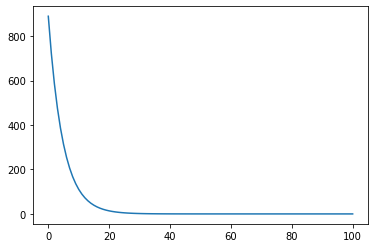

In [18]:
plt.plot(error_list)
plt.show()

#Error_list is drastically decreasing.

In [19]:
print(final_theta) # Value of theta[0] and theta[1] i.e values of intercept.

[0.996554  0.0013579]


In [20]:
# plot the line for testing data
xtest=np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


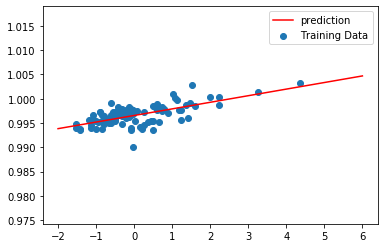

In [23]:
plt.scatter(x,y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='red',label='prediction')
plt.legend()
plt.show()

# Linear Regression 
## Scikit Learn Implementation

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# data preparation \ data loading
dfx=pd.read_csv('./linearX.csv')
dfy=pd.read_csv('./linearY.csv')

x=dfx.values
y=dfy.values

x=x.reshape((-1,1))
y=y.reshape((-1,1))
#print(x)  gives 2-D array.
#print(x.shape)
#print(y.shape)

In [3]:
#print(x,type(x))
print(y,type(y))

[[0.99007]
 [0.99769]
 [0.99386]
 [0.99508]
 [0.9963 ]
 [1.0032 ]
 [0.99768]
 [0.99584]
 [0.99609]
 [0.99774]
 [1.0003 ]
 [0.99694]
 [0.99965]
 [0.99549]
 [0.99364]
 [0.99378]
 [0.99379]
 [0.99524]
 [0.9988 ]
 [0.99733]
 [0.9966 ]
 [0.9955 ]
 [0.99471]
 [0.99354]
 [0.99786]
 [0.9965 ]
 [0.9988 ]
 [0.9964 ]
 [0.99713]
 [0.9985 ]
 [0.99565]
 [0.99578]
 [0.9976 ]
 [1.0014 ]
 [0.99685]
 [0.99648]
 [0.99472]
 [0.99914]
 [0.99408]
 [0.9974 ]
 [1.0002 ]
 [0.99402]
 [0.9966 ]
 [0.99402]
 [1.0029 ]
 [0.99718]
 [0.9986 ]
 [0.9952 ]
 [0.9952 ]
 [0.9972 ]
 [0.9976 ]
 [0.9968 ]
 [0.9978 ]
 [0.9951 ]
 [0.99629]
 [0.99656]
 [0.999  ]
 [0.99836]
 [0.99396]
 [0.99387]
 [1.0004 ]
 [0.9972 ]
 [0.9972 ]
 [0.99546]
 [0.9978 ]
 [0.99596]
 [0.99572]
 [0.9992 ]
 [0.99544]
 [0.99747]
 [0.99668]
 [0.9962 ]
 [0.99346]
 [0.99514]
 [0.99476]
 [1.001  ]
 [0.9961 ]
 [0.99598]
 [0.99608]
 [0.9966 ]
 [0.99732]
 [0.9962 ]
 [0.99546]
 [0.99738]
 [0.99456]
 [0.9966 ]
 [0.99553]
 [0.9984 ]
 [0.9952 ]
 [0.997  ]
 [0.99586]

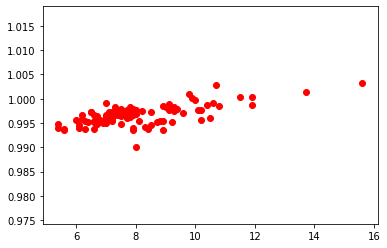

In [4]:
# plotting
plt.scatter(x,y,color='red')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model=LinearRegression() # Get the object of linearRegression class.

In [7]:
# Now I want to fit this data set on my object.
#Training
model.fit(x,y)  # Scikit works on 2-D list.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Prediction
output=model.predict(x)  # Wanted to predict x.

In [9]:
bias=model.intercept_    # Intercept 
coeff=model.coef_        # Coefficient is slope i.e theta.

print(bias)
print(coeff)

[0.9903092]
[[0.00078556]]


In [10]:
model.score(x,y)  #43% accuracy of this model.

0.43818504557920035

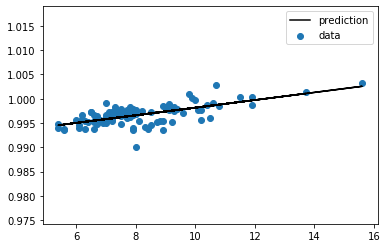

In [11]:
## Visualise

plt.scatter(x,y,label='data')
plt.plot(x,output,color='black',label='prediction')
plt.legend()
plt.show()

# Assignment-1

#### Logistic Regression
#####  WITHOUT SCIKIT

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
X = pd.read_csv("./Linear_X_Train.csv")
Y = pd.read_csv("./Linear_Y_Train.csv")

In [20]:
x = X.values
y = Y.values
x = x.reshape((-1,))
y = y.reshape((-1,))
print(x.shape, y.shape)

(3750,) (3750,)


-0.03779466168006855 0.9920801322508517


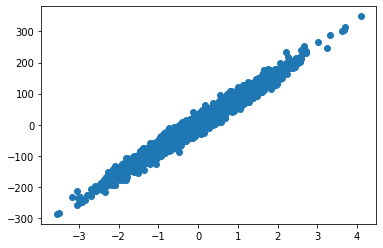

In [21]:
plt.scatter(x,y)
print(x.mean() , x.std())
#data already standarised
x_train = (x-x.mean())/x.std()
y_train = y


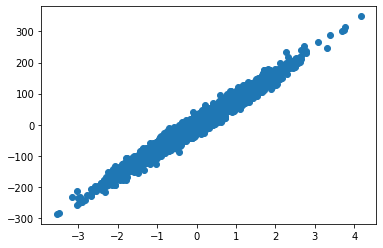

In [22]:
plt.scatter(x_train,y_train)

In [23]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [24]:
def error(x,theta,y):
    err = 0.0
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],theta)
        err += (hx-y[i])**2
    return err

In [25]:
def gradient(x,theta,y):
    m = x.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        hx = hypothesis(x[i],theta)
        grad[0] += (hx - y[i])
        grad[1] += (hx - y[i])*x[i]
    return grad/m

In [26]:
def gradient_descent(x,y,learning_rate = 0.01):
    theta = np.zeros((2,))
    err_list = []
    theta_list = []
    for i in range(1000):
        grad = gradient(x,theta,y)
        err = error(x,theta,y)
        err_list.append(err)
        theta_list.append((theta[0],theta[1]))
        
        theta[0] -= (learning_rate*(grad[0]))
        theta[1] -= (learning_rate*grad[1])
    return theta,err_list,theta_list

In [27]:
final_theta , err_list , theta_list = gradient_descent(x_train,y_train)

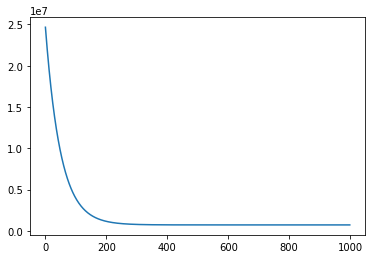

In [28]:
plt.plot(err_list)

In [29]:
print(final_theta)

[ 0.68383944 79.90228731]


In [30]:
X_test = pd.read_csv("./Linear_X_Test.csv")
X_test = X_test.values
X_test = X_test.reshape((-1,))
print(X_test.shape)
x_test = X_test

(1250,)


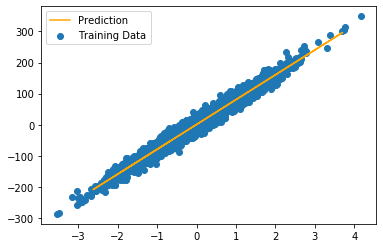

In [31]:
plt.scatter(x_train,y_train,label='Training Data')
plt.plot(x_test,hypothesis(x_test,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()

##### WITH SCIKIT

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()
x_train = X.values.reshape((-1,1))
y_train = Y.values.reshape((-1,1))

In [34]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
X_test = pd.read_csv("./Linear_X_Test.csv")
X_test = X_test.values
x_test = X_test.reshape((-1,1))

In [37]:
output = model.predict(x_test)

In [38]:
bias = model.intercept_
coeff = model.coef_
print(bias)
print(coeff)

[3.72798828]
[[80.54363185]]


In [39]:
model.score(x_train,y_train)

0.9709612233822353

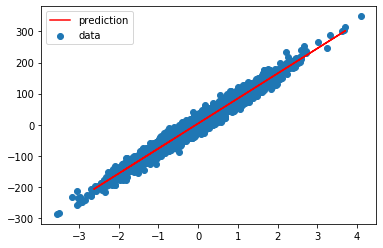

In [41]:
plt.scatter(x_train,y_train,label='data')
plt.plot(x_test,output,color='red',label='prediction')
plt.legend()
plt.show()